In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# X = df.drop("target", axis=1)
# y = df['target']

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier().fit(X,y)

# X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
# y_pred=model.predict(X_test)

# submission = pd.DataFrame({"id": range(0,X_test.shape[0]), 
#                            "target": y_pred}) 

# submission.to_csv('submission.csv',index=False)

In [3]:
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [4]:
print(test.info())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

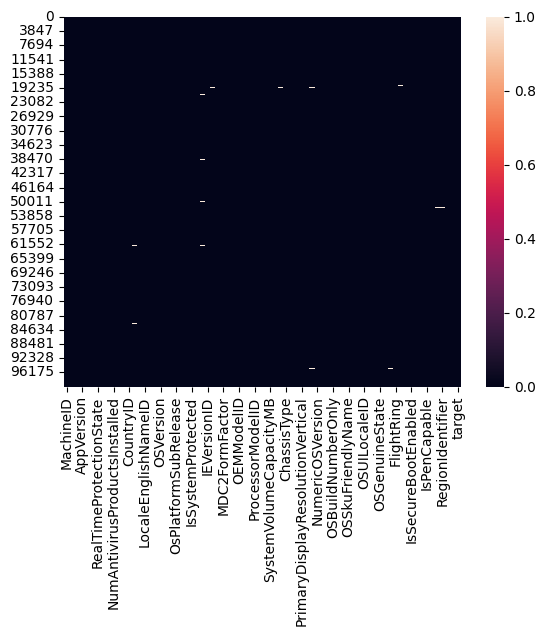

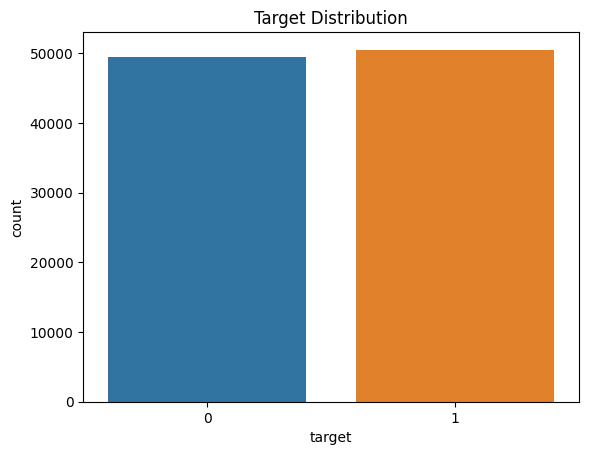

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train.isnull())
plt.show()

sns.countplot(x='target', data=train)
plt.title('Target Distribution')
plt.show()

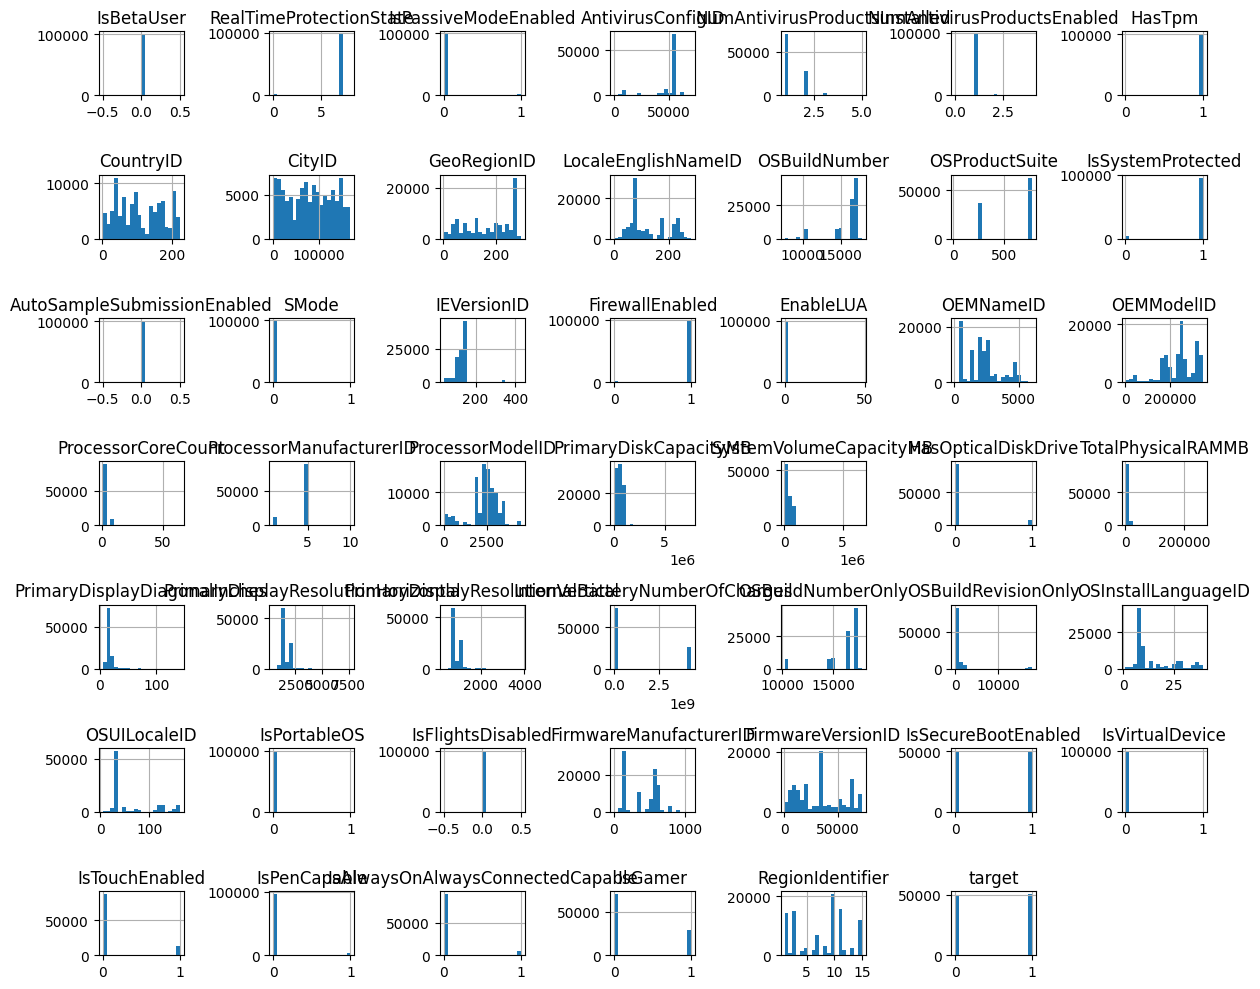

In [6]:
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[num_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


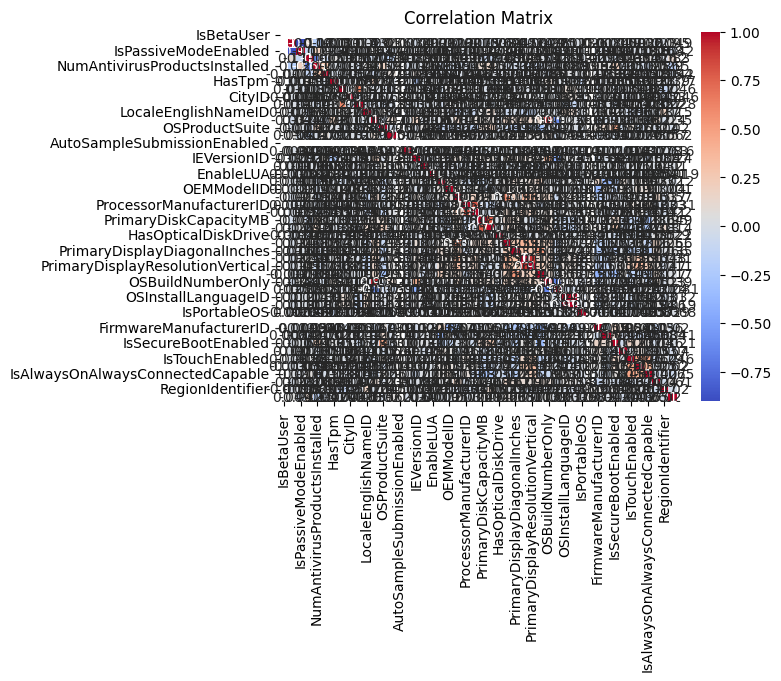

In [7]:
corr = train[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
import json

def check_column_similarity(train, test):
    results = {}
    
    columns_to_check = [col for col in train.columns if col != 'target']
    
    for column in columns_to_check:
        # if column doesn't exist in both datasets basically this is for the target column 
        if column not in train.columns or column not in test.columns:
            continue
            
        train_values = set(train[column].dropna().unique())
        test_values = set(test[column].dropna().unique())
        
        # same same values
        common_values = train_values.intersection(test_values)
        
        pct_test_in_train = 100 * len(common_values) / len(test_values) if len(test_values) > 0 else 0
        
        results[column] = {
            'unique_train_values': len(train_values),
            'unique_test_values': len(test_values),
            'common_values_count': len(common_values),
            'pct_test_values_in_train': round(pct_test_in_train, 2), # %age
            'all_test_in_train': test_values.issubset(train_values),
            'all_values_same': train_values == test_values
        }
    
    return results

similarity_results = check_column_similarity(train, test)
print(json.dumps(similarity_results, indent=4))

{
    "MachineID": {
        "unique_train_values": 99835,
        "unique_test_values": 9998,
        "common_values_count": 42,
        "pct_test_values_in_train": 0.42,
        "all_test_in_train": false,
        "all_values_same": false
    },
    "ProductName": {
        "unique_train_values": 2,
        "unique_test_values": 2,
        "common_values_count": 2,
        "pct_test_values_in_train": 100.0,
        "all_test_in_train": true,
        "all_values_same": true
    },
    "EngineVersion": {
        "unique_train_values": 37,
        "unique_test_values": 31,
        "common_values_count": 30,
        "pct_test_values_in_train": 96.77,
        "all_test_in_train": false,
        "all_values_same": false
    },
    "AppVersion": {
        "unique_train_values": 69,
        "unique_test_values": 59,
        "common_values_count": 56,
        "pct_test_values_in_train": 94.92,
        "all_test_in_train": false,
        "all_values_same": false
    },
    "SignatureVersion": 

In [4]:
extra_columns_to_be_removed = [
    'MachineID', 'IsBetaUser', 'AutoSampleSubmissionEnabled',
    'IsFlightsDisabled', 'ProductName', 'RealTimeProtectionState',
    'PrimaryDiskType', 'OSInstallType', 'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled', 'HasTpm', 'IsPassiveModeEnabled',
    'PlatformType', 'Processor', 'OSArchitecture', 'IsSystemProtected',
    'SMode', 'FirewallEnabled', 'DeviceFamily', 'IsSecureBootEnabled',
    'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable',
    'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier'
]

large_no_of_unique_values = [
    'CityID', 'OEMModelID', 'FirmwareVersionID',
    'ProcessorModelID', 'OEMNameID'
]

categorical_cols = [
    'EngineVersion', 'AppVersion', 'SignatureVersion',
    'OsPlatformSubRelease', 'OSBuildLab', 'OSBranch',
    'OSSkuFriendlyName', 'AutoUpdateOptionsName', 'FlightRing',
    'ChassisType', 'MDC2FormFactor', 'OSVersion', 'OSProductSuite',
    'SKUEditionName', 'OSEdition', 'OSGenuineState', 
    'LicenseActivationChannel', 'PowerPlatformRole'
]

numerical_cols = [
    'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
    'SystemVolumeCapacityMB', 'InternalBatteryNumberOfCharges',
    'AntivirusConfigID', 'CountryID', 'GeoRegionID',
    'IEVersionID', 'LocaleEnglishNameID', 'OSBuildNumber',
    'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID',
    'OSUILocaleID', 'PrimaryDiskCapacityMB',
    'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
    'ProcessorCoreCount', 'ProcessorManufacturerID'
]

binary_cols = [
    'EnableLUA', 'HasOpticalDiskDrive', 'IsPortableOS'
]


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def create_feature_pipeline(train_data, test_data):

    # finding the common features between the train and test dataset
    min_no_of_common_unique_values_per_col = {}
    
    for col in categorical_cols + large_no_of_unique_values:
        if col in train_data.columns and col in test_data.columns:
            train_unique = train_data[col].nunique()
            test_unique = test_data[col].nunique()
            min_no_of_common_unique_values_per_col[col] = min(train_unique, test_unique)
        else:
            # this is just for the safety purpose as all the cols of the training and testing dataset will be same so as such no need we can remove this :)
            print(f"Column {col} not found in data")
            min_no_of_common_unique_values_per_col[col] = 1
    print(f'Category Limits: {min_no_of_common_unique_values_per_col}')

    # Numerical pipeline
    numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Binary pipeline
    binary_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
    ])
    
    # Categorical pipeline
    categorical_cols_transformations = []
    
    # Large No of unique values category
    for col in large_no_of_unique_values:
        if col in train_data.columns:
            pipe = Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value=-999)),
                ('encoder', OneHotEncoder(
                    max_categories=max(1, int(min_no_of_common_unique_values_per_col[col] * 0.2)),
                    handle_unknown='ignore',
                    sparse_output=False
                ))
            ])
            categorical_cols_transformations.append((f'cat_{col}', pipe, [col]))
    
    # simple categorical features
    for col in categorical_cols:
        if col in train_data.columns:
            pipe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(
                    max_categories=min_no_of_common_unique_values_per_col[col],
                    handle_unknown='ignore',
                    sparse_output=False
                ))
            ])
            categorical_cols_transformations.append((f'cat_{col}', pipe, [col]))

    # Only include features that exist in the data
    numerical_col = [col for col in numerical_cols if col in train_data.columns]
    binary_col = [col for col in binary_cols if col in train_data.columns]
    
    return ColumnTransformer(
        transformers=categorical_cols_transformations + [
            ('num', numerical_pipe, numerical_col),
            ('bin', binary_pipe, binary_col)
        ],
        remainder='drop'
    )


In [26]:
extra_columns_to_be_removed_without_dates = [col for col in extra_columns_to_be_removed if col not in ['DateAS', 'DateOS']]
train_clean = train.drop(columns=extra_columns_to_be_removed_without_dates, errors='ignore')
test_clean = test.drop(columns=extra_columns_to_be_removed_without_dates, errors='ignore')

In [27]:
for df in [train_clean, test_clean]:
    df['OS_Install_Age_Days'] = (
        pd.to_datetime(df['DateAS']) - pd.to_datetime(df['DateOS'])
    ).dt.days
    
    # first calcualte the age of os then drop the date cols
    df.drop(columns=['DateAS', 'DateOS'], inplace=True)

In [28]:
numerical_cols.append('OS_Install_Age_Days')

full_pipeline = Pipeline([
    ('preprocessor', create_feature_pipeline(train_clean, test_clean)),
    ('feature_selector', SelectKBest(f_classif, k=30))
])


Category Limits: {'EngineVersion': 31, 'AppVersion': 59, 'SignatureVersion': 1438, 'OsPlatformSubRelease': 9, 'OSBuildLab': 171, 'OSBranch': 12, 'OSSkuFriendlyName': 14, 'AutoUpdateOptionsName': 6, 'FlightRing': 7, 'ChassisType': 21, 'MDC2FormFactor': 9, 'OSVersion': 3, 'OSProductSuite': 3, 'SKUEditionName': 7, 'OSEdition': 15, 'OSGenuineState': 4, 'LicenseActivationChannel': 5, 'PowerPlatformRole': 8, 'CityID': 3721, 'OEMModelID': 3865, 'FirmwareVersionID': 3451, 'ProcessorModelID': 905, 'OEMNameID': 267}


In [29]:
X_train = full_pipeline.fit_transform(train_clean, train_clean['target'])
y_train = train_clean['target']
X_test = full_pipeline.transform(test_clean)

print("Processed training shape:", X_train.shape)
print("Processed test shape:", X_test.shape)


Processed training shape: (100000, 30)
Processed test shape: (10000, 30)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso, Ridge, LinearRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Naive Bayes': GaussianNB()
}


param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'loss': ['hinge', 'log_loss']},
    'Decision Tree': {'max_depth': [5, 10, 15, 20]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 15, 20]},
    'Linear Regression': {},
    'Lasso': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Ridge': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Naive Bayes': {}
}

classification_scoring = 'accuracy'
regression_scoring = 'neg_mean_squared_error'

best_models = {}
best_scores = {}

for name, model in models.items():
    print("--------------------------------------------------")
    print(f"Model: {name}")
    print("--------------------------------------------------")
    
    if name in ['Lasso', 'Ridge', 'Linear Regression']:  
        scoring = regression_scoring
    else:
        scoring = classification_scoring
    
    grid = GridSearchCV(
        model, 
        param_grids[name], 
        cv=5, 
        scoring=scoring,
        n_jobs=-1,
        error_score='raise'
    )
    
    try:
        grid.fit(X_train, y_train)
        
        best_models[name] = grid.best_estimator_
        best_scores[name] = grid.best_score_
        
        print(f"Best params: {grid.best_params_}")
        print(f"Best score: {grid.best_score_:.4f}")
        
    except Exception as e:
        print(f"Error in {name}: {str(e)}")


--------------------------------------------------
Model: Logistic Regression
--------------------------------------------------
Best params: {'C': 0.1}
Best score: 0.5935
--------------------------------------------------
Model: SGD Classifier
--------------------------------------------------
Best params: {'alpha': 0.001, 'loss': 'log_loss'}
Best score: 0.5910
--------------------------------------------------
Model: Decision Tree
--------------------------------------------------
Best params: {'max_depth': 10}
Best score: 0.6046
--------------------------------------------------
Model: Random Forest
--------------------------------------------------
Best params: {'max_depth': 15, 'n_estimators': 200}
Best score: 0.6105
--------------------------------------------------
Model: Linear Regression
--------------------------------------------------
Best params: {}
Best score: -0.2380
--------------------------------------------------
Model: Lasso
-----------------------------------------

In [52]:
classification_models = {k: v for k, v in best_scores.items() if k not in ['Lasso', 'Ridge', 'Linear Regression']}
best_model_name = max(classification_models, key=classification_models.get)
best_model = best_models[best_model_name]
best_score = classification_models[best_model_name]

print(f"\nBest model: {best_model_name} with accuracy: {best_score:.4f}")

test_predictions = best_model.predict(X_test)


Best model: Random Forest with accuracy: 0.6105


In [34]:
submission = pd.DataFrame({
    "id": range(0, X_test.shape[0]), 
    "target": test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")
print(submission.head())

Submission file created!
   id  target
0   0       1
1   1       1
2   2       1
3   3       0
4   4       0


In [45]:
regression_models = {k: -v for k, v in best_scores.items()  
                     if k in ['Lasso', 'Ridge', 'Linear Regression']}

best_model_name = min(regression_models, key=regression_models.get)  
best_model = best_models[best_model_name]
best_score = regression_models[best_model_name]

print(f"\nBest Regression Model: {best_model_name} with MSE: {best_score:.4f}")

test_predictions = best_model.predict(X_test)
test_predictions = np.where(test_predictions < 0.50, 0, 1)


Best Regression Model: Ridge with MSE: 0.2380


In [46]:
submission = pd.DataFrame({
    "id": range(0, X_test.shape[0]), 
    "target": test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created!")
print(submission.head())

Submission file created!
   id  target
0   0       1
1   1       1
2   2       1
3   3       1
4   4       0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


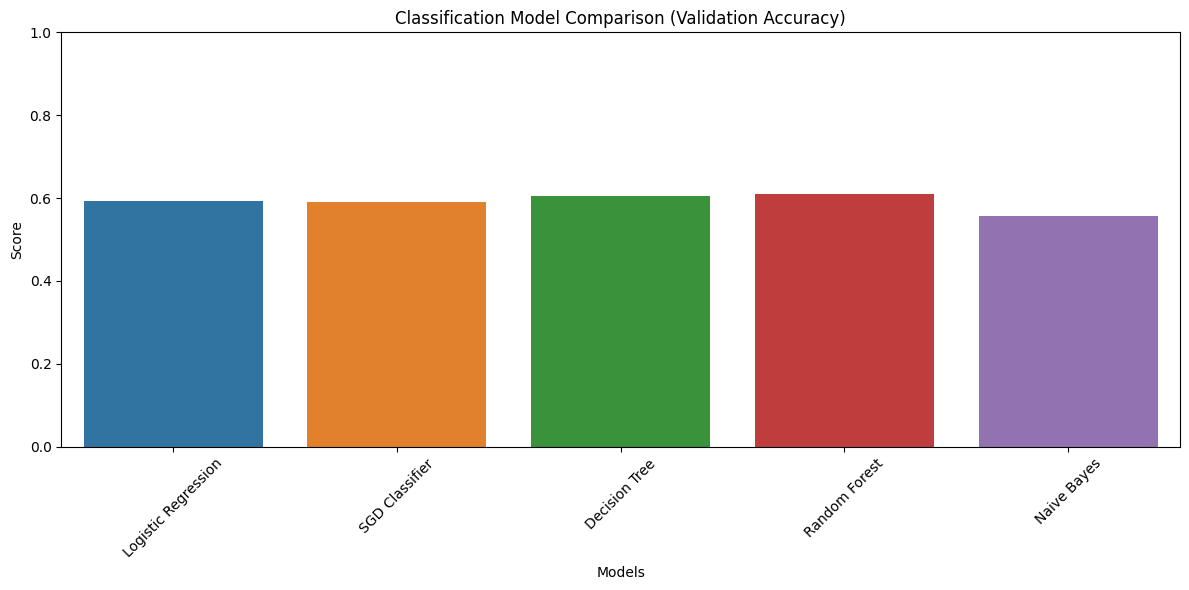

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(classification_models.keys())
scores = list(classification_models.values())

plt.figure(figsize=(12, 6))

sns.barplot(x=model_names, y=scores)


plt.xticks(rotation=45)
plt.title("Classification Model Comparison (Validation Accuracy)")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


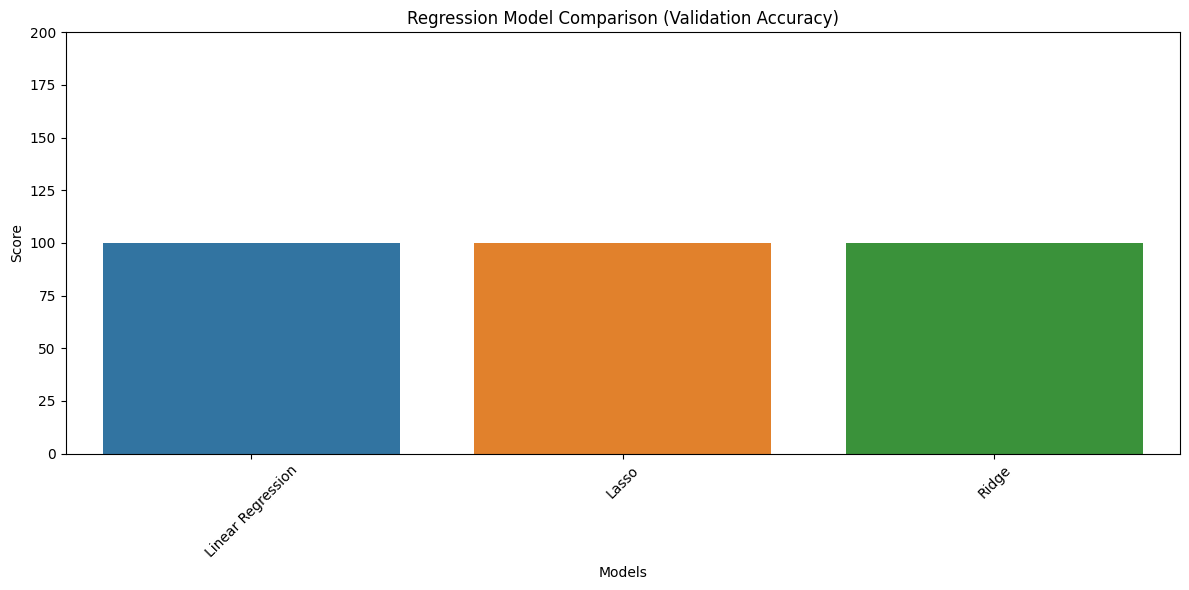

In [57]:
model_names = list(regression_models.keys())
scores = list(regression_models.values())


transformed_scores = []
for score in scores:
    transformed_score = 100 - abs(score)
    transformed_scores.append(transformed_score)

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=transformed_scores)


plt.xticks(rotation=45)
plt.title("Regression Model Comparison (Validation Accuracy)")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 200)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

models = {
    'SVM': SVC()
}

param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}


classification_scoring = 'accuracy'
regression_scoring = 'neg_mean_squared_error'

best_models = {}
best_scores = {}

for name, model in models.items():
    print(f"Model {name}...")
    
    # Choose appropriate scoring metric
    if name in ['Lasso', 'Ridge']:
        scoring = regression_scoring
    else:
        scoring = classification_scoring
    
    grid = GridSearchCV(
        model, 
        param_grids[name], 
        cv=5, 
        scoring=scoring,
        n_jobs=-1  # Use all available cores
    )
    
    grid.fit(X_train, y_train)
    

    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    
    print(f"  Best params: {grid.best_params_}")
    print(f"  Best score: {grid.best_score_:.4f}")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

models = {
    'Random Forest': RandomForestClassifier(),
}

param_grids = {
    'Random Forest': rf_param_grid,
}

best_models = {}
best_scores = {}

for name, model in models.items():
    print(f"Model {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=50,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    search.fit(X_train, y_train)
    
    best_models[name] = search.best_estimator_
    best_scores[name] = search.best_score_
    
    print(f"  Best params: {search.best_params_}")
    print(f"  Best score: {search.best_score_:.4f}\n")


for name, score in best_scores.items():
    print(f"{name}: {score:.4f}")


Model Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
